# Hieracical unsupervised learning models

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

## 1. Prepare Data

In [100]:
# Ubication of the file to load
path ='nci_var_filtered.csv'
data = pd.read_csv(path, sep='\t')
# Change the index from the numerical index to the column 'gene'
data = data.set_index('gene')
# Show first 5 lines ofthe final data
data.head(5)

,786-0,A498,A549,ACHN,BT-549,CAKI-1,CCRF-CEM,COLO205,DU-145,EKVX,...,SNB-19,SNB-75,SR,SW-620,T-47D,TK-10,U251,UACC-257,UACC-62,UO-31
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,-1.025477,-0.925477,0.274523,-0.875477,2.484523,1.244523,1.914523,-1.025477,0.584523,0.094523,...,0.494523,-0.705477,0.914523,-0.885477,1.524523,-0.995477,0.314523,1.774523,2.104523,-0.665477
A2M,-1.409323,-1.409323,-1.409323,-1.409323,-1.409323,-1.399323,-1.299323,-1.409323,-1.399323,0.100677,...,-0.889323,-0.729323,-1.409323,-1.229323,-1.399323,-1.399323,-1.369323,5.630677,3.280677,-1.399323
A2ML1,-1.696062,-1.686062,-1.686062,-1.686062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.586062,...,-1.696062,-1.696062,-1.696062,-1.696062,-1.636062,-1.696062,-1.696062,-1.686062,-1.586062,-1.696062
A4GALT,1.978677,1.588677,0.908677,0.348677,1.098677,1.488677,-1.791323,-1.041323,-0.601323,1.498677,...,0.008677,2.308677,-2.241323,-1.101323,0.668677,-0.181323,-0.131323,-2.241323,-1.581323,1.368677
AAAS,0.878385,0.178385,1.658385,-0.291615,-0.011615,0.568385,1.518385,0.148385,0.158385,1.038385,...,-0.041615,0.638385,0.608385,1.968385,1.218385,0.098385,0.238385,0.778385,0.558385,0.508385


In [101]:
# It is mandatory to transpose the dataframe to have column names as headers
data = data.T
# Show first 5 lines ofthe final data
data.head(5)

gene,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AAED1,AAGAB,AAMP,...,ZSWIM7,ZSWIM8,ZUFSP,ZW10,ZWILCH,ZXDA,ZXDB,ZXDC,ZYG11B,ZZZ3
786-0,-1.025477,-1.409323,-1.696062,1.978677,0.878385,-0.354923,-0.809323,1.419631,0.369015,-0.128523,...,0.266154,0.002246,0.482123,0.605908,2.007554,-0.359754,-0.193538,-0.565677,-0.243108,0.456292
A498,-0.925477,-1.409323,-1.686062,1.588677,0.178385,-0.184923,-0.389323,1.779631,0.249015,-0.198523,...,0.106154,0.042246,0.092123,-0.384092,1.227554,0.770246,0.386462,-0.705677,-0.233108,-0.113708
A549,0.274523,-1.409323,-1.686062,0.908677,1.658385,-0.074923,0.880677,0.809631,0.649015,0.381477,...,0.366154,-0.627754,-0.047877,0.405908,2.227554,0.040246,0.616462,-0.775677,-0.243108,-0.433708
ACHN,-0.875477,-1.409323,-1.686062,0.348677,-0.291615,-0.014923,-0.809323,1.179631,-0.500985,-1.038523,...,0.266154,0.092246,0.192123,-0.854092,0.947554,-0.259754,-0.533538,-1.125677,-1.633108,-0.203708
BT-549,2.484523,-1.409323,-1.696062,1.098677,-0.011615,-2.114923,-0.809323,1.379631,-0.630985,-1.168523,...,0.306154,0.702246,0.752123,0.465908,0.887554,-0.199754,-0.083538,-0.785677,-0.773108,0.586292


In [102]:
# Gettng a list of all genes by retrieving column names from our data
genes = list(data.columns.values)
genes

['A1BG',
 'A2M',
 'A2ML1',
 'A4GALT',
 'AAAS',
 'AACS',
 'AADAC',
 'AAED1',
 'AAGAB',
 'AAMP',
 'AAR2',
 'AARS',
 'AARS2',
 'AASDH',
 'AASDHPPT',
 'AATK',
 'ABAT',
 'ABCA2',
 'ABCA3',
 'ABCA6',
 'ABCA7',
 'ABCA8',
 'ABCA9',
 'ABCB10',
 'ABCB11',
 'ABCB8',
 'ABCC1',
 'ABCC10',
 'ABCC11',
 'ABCC5',
 'ABCC6',
 'ABCC8',
 'ABCD1',
 'ABCD3',
 'ABCD4',
 'ABCE1',
 'ABCF1',
 'ABCF2',
 'ABCF3',
 'ABCG4',
 'ABHD1',
 'ABHD10',
 'ABHD11',
 'ABHD12',
 'ABHD13',
 'ABHD14A',
 'ABHD14B',
 'ABHD15',
 'ABHD17A',
 'ABHD17B',
 'ABHD17C',
 'ABHD2',
 'ABHD3',
 'ABHD4',
 'ABHD5',
 'ABHD8',
 'ABI1',
 'ABI2',
 'ABI3',
 'ABO',
 'ABRA',
 'ABRACL',
 'ABT1',
 'ABTB1',
 'ACAA1',
 'ACAA2',
 'ACAD10',
 'ACAD8',
 'ACAD9',
 'ACADL',
 'ACADM',
 'ACADS',
 'ACADSB',
 'ACADVL',
 'ACAP2',
 'ACAP3',
 'ACAT1',
 'ACAT2',
 'ACBD3',
 'ACBD4',
 'ACBD5',
 'ACBD7',
 'ACCS',
 'ACCSL',
 'ACD',
 'ACE',
 'ACE2',
 'ACIN1',
 'ACLY',
 'ACMSD',
 'ACO1',
 'ACO2',
 'ACOT12',
 'ACOT13',
 'ACOT4',
 'ACOT7',
 'ACOT8',
 'ACOX1',
 'ACOX2',
 'ACP1'

## 2. Hierachical Clustering

## 2.1 Method = Ward

### 2.1.1 Metric = Euclidean

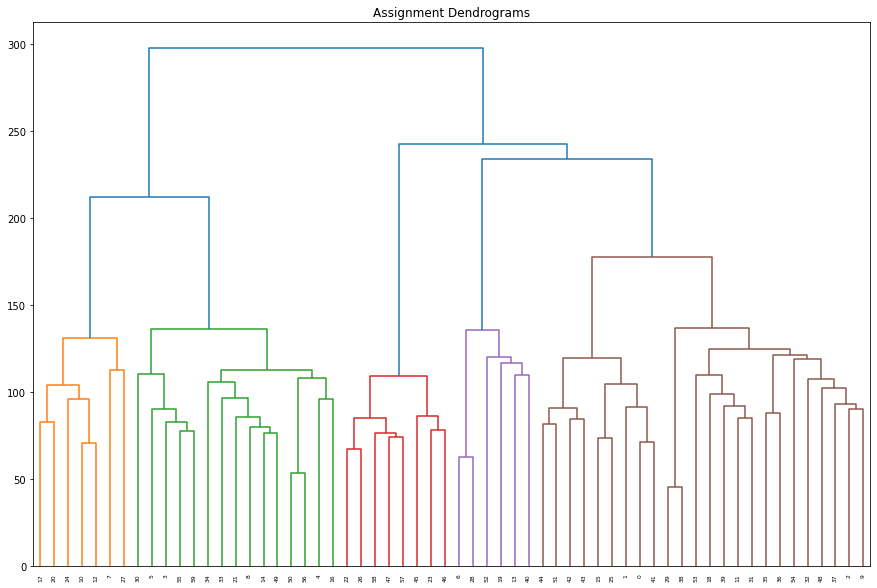

In [103]:
# Ward linkage method only accepts euclidena distance.
plt.figure(figsize=(15, 10))  
plt.title("Assignment Dendrograms")  
dend = shc.dendrogram(shc.linkage(data.values, method='ward', metric='euclidean'))

In [104]:
# Dividing by agglomerative process in 5 clusters with euclidean distance and ward linkage method
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit(data.values) 
# Show result labels of each element
print(cluster.labels_)  
# Separating the labels in each cluster to know the distribution ammount 
unique, counts = np.unique(cluster.labels_, return_counts=True)
result = np.column_stack((unique, counts)) 
# Print result of the separation
print (result)

[0 0 0 1 1 1 3 4 1 0 4 0 4 3 1 0 1 4 0 3 4 1 2 2 4 0 2 4 3 0 1 0 0 1 1 0 0
 0 0 0 3 0 0 0 0 2 2 2 0 1 1 0 3 0 0 1 1 2 2 1]
[[ 0 24]
 [ 1 15]
 [ 2  8]
 [ 3  6]
 [ 4  7]]


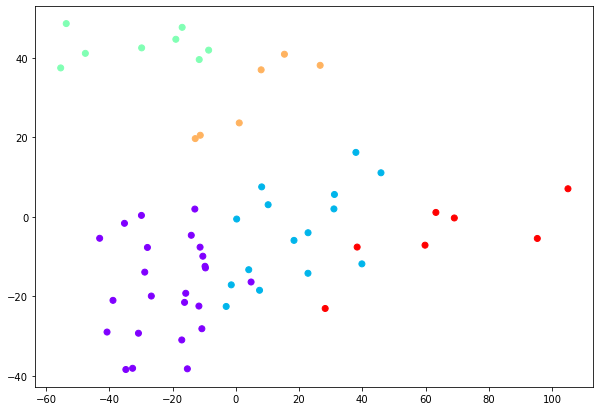

In [105]:
# It is mandatory to do the principal component analysis to show the scatter plot
pca = PCA(n_components=2)
pca.fit(data.values)
reduced_data = pca.fit_transform(data.values)
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=cluster.labels_, cmap='rainbow') 

## 2.2. Method = Single



### 2.2.1. Metric = Euclidean

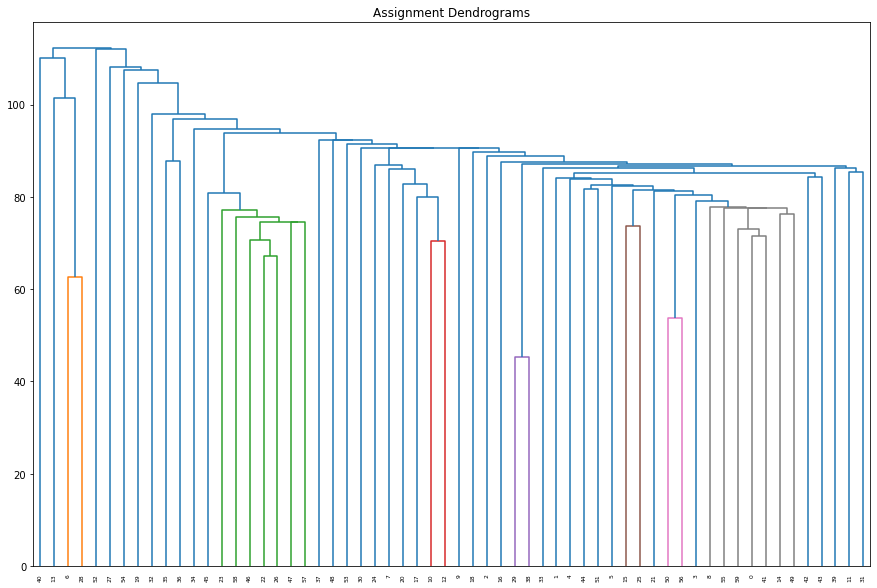

In [106]:
plt.figure(figsize=(15, 10))  
plt.title("Assignment Dendrograms")  
dend = shc.dendrogram(shc.linkage(data.values, method='single', metric='euclidean'))  

[0 0 0 0 0 0 2 0 0 0 0 0 0 7 0 0 0 0 0 6 0 0 0 0 0 0 0 4 2 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 5 0 0 0 0 0]
[[ 0 52]
 [ 1  1]
 [ 2  2]
 [ 3  1]
 [ 4  1]
 [ 5  1]
 [ 6  1]
 [ 7  1]]


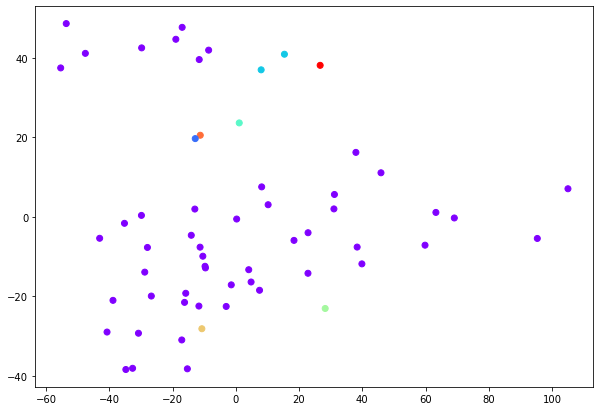

In [107]:
# Dividing by agglomerative process in 5 clusters with euclidean distance and ward linkage method
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='single')  
cluster.fit(data.values)  
# Show result labels of each element
print(cluster.labels_)  
# Separating the labels in each cluster to know the distribution ammount 
unique, counts = np.unique(cluster.labels_, return_counts=True)
result = np.column_stack((unique, counts)) 
# Print result of the separation
print (result)

# It is mandatory to do the principal component analysis to show the scatter plot
pca = PCA(n_components=2)
pca.fit(data.values)
reduced_data = pca.fit_transform(data.values)
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=cluster.labels_, cmap='rainbow') 

### 2.2.2. Metriic = Minkowski

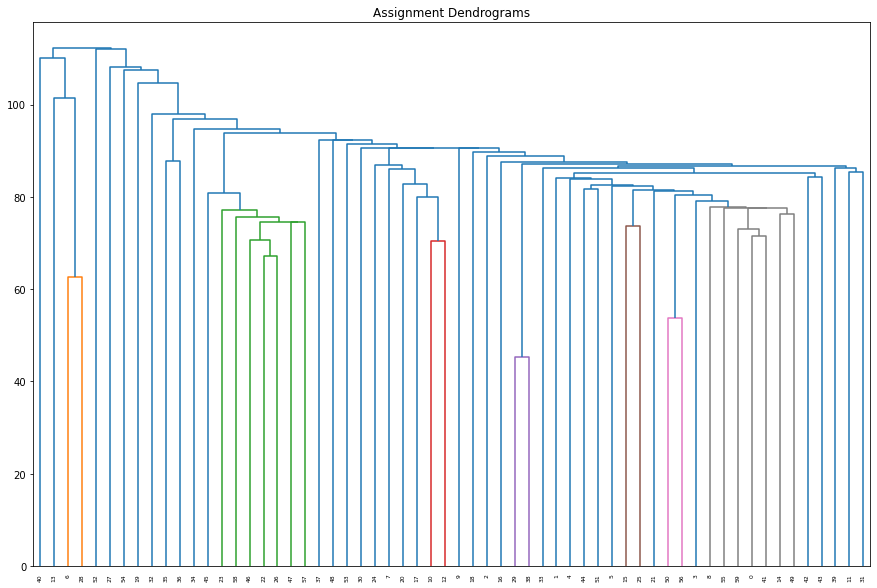

In [108]:
plt.figure(figsize=(15, 10))  
plt.title("Assignment Dendrograms")  
dend = shc.dendrogram(shc.linkage(data.values, method='single', metric='minkowski'))  

[0 0 0 0 0 0 2 0 0 0 0 0 0 7 0 0 0 0 0 6 0 0 0 0 0 0 0 4 2 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 5 0 0 0 0 0]
[[ 0 52]
 [ 1  1]
 [ 2  2]
 [ 3  1]
 [ 4  1]
 [ 5  1]
 [ 6  1]
 [ 7  1]]


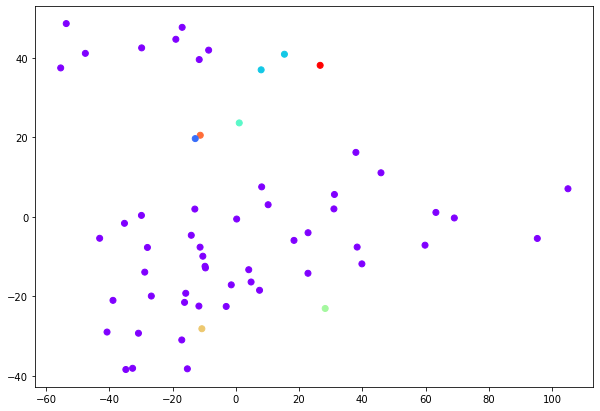

In [109]:
# Dividing by agglomerative process in 5 clusters with euclidean distance and ward linkage method
cluster = AgglomerativeClustering(n_clusters=8, affinity='minkowski', linkage='single')  
cluster.fit(data.values)  
# Show result labels of each element
print(cluster.labels_)  
# Separating the labels in each cluster to know the distribution ammount 
unique, counts = np.unique(cluster.labels_, return_counts=True)
result = np.column_stack((unique, counts)) 
# Print result of the separation
print (result)

# It is mandatory to do the principal component analysis to show the scatter plot
pca = PCA(n_components=2)
pca.fit(data.values)
reduced_data = pca.fit_transform(data.values)
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=cluster.labels_, cmap='rainbow') 

### 2.2.3. Metric =  Chebyshev

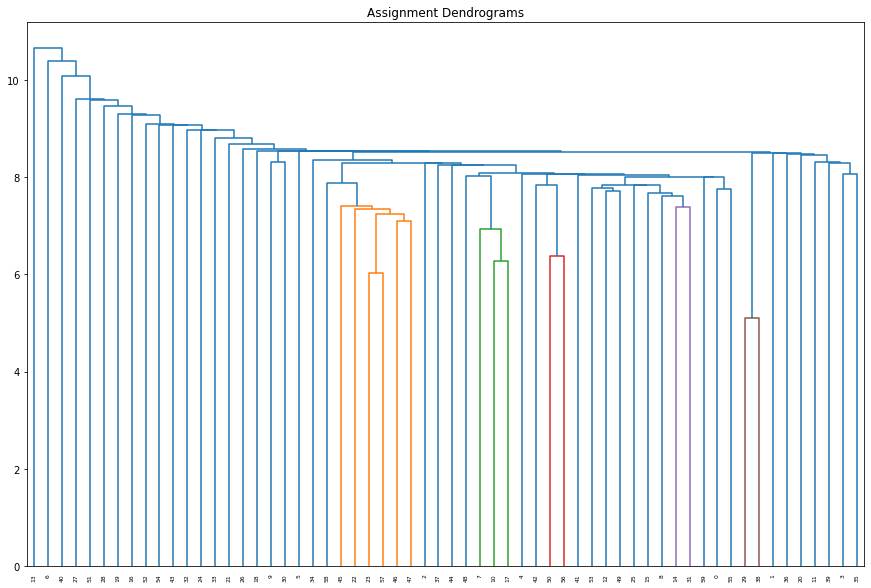

In [110]:
plt.figure(figsize=(15, 10))  
plt.title("Assignment Dendrograms")  
dend = shc.dendrogram(shc.linkage(data.values, method='single', metric='chebyshev'))  

[0 0 0 0 0 0 5 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
[[ 0 55]
 [ 1  1]
 [ 2  1]
 [ 3  1]
 [ 4  1]
 [ 5  1]]


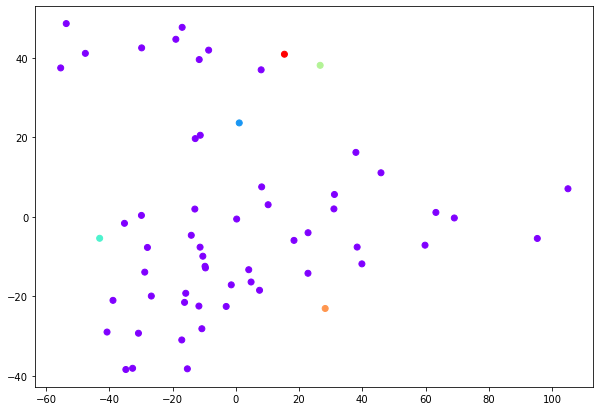

In [111]:
# Dividing by agglomerative process in 5 clusters with euclidean distance and ward linkage method
cluster = AgglomerativeClustering(n_clusters=6, affinity='chebyshev', linkage='single')  
cluster.fit(data.values)  
# Show result labels of each element
print(cluster.labels_)  
# Separating the labels in each cluster to know the distribution ammount 
unique, counts = np.unique(cluster.labels_, return_counts=True)
result = np.column_stack((unique, counts)) 
# Print result of the separation
print (result)

# It is mandatory to do the principal component analysis to show the scatter plot
pca = PCA(n_components=2)
pca.fit(data.values)
reduced_data = pca.fit_transform(data.values)
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=cluster.labels_, cmap='rainbow') 

### 2.2.4. Metric = Cityblock

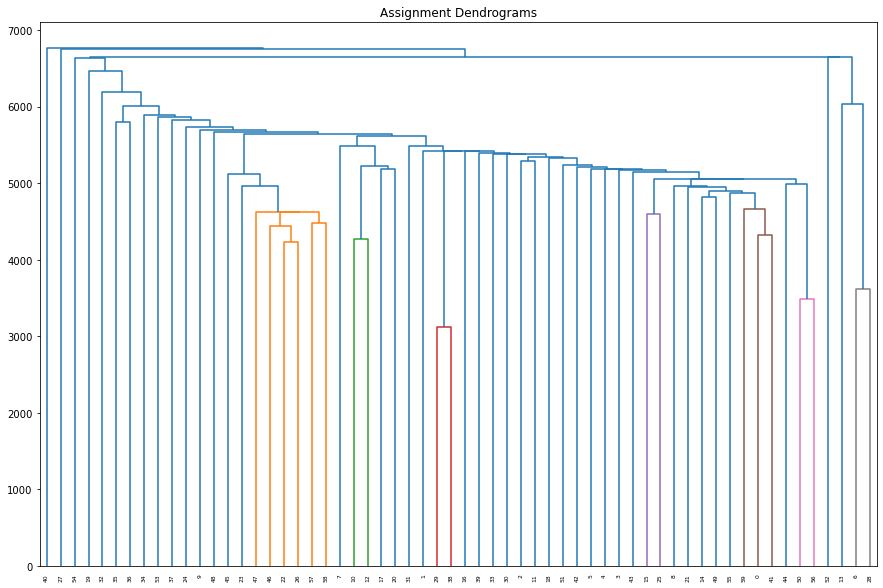

In [112]:
plt.figure(figsize=(15, 10))  
plt.title("Assignment Dendrograms")  
dend = shc.dendrogram(shc.linkage(data.values, method='single', metric='cityblock'))  

[1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 6 1 1 1 1 1 1 1 5 0 1 1 1 7 1 1 1 1
 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 4 1 2 1 1 1 1 1]
[[ 0  3]
 [ 1 51]
 [ 2  1]
 [ 3  1]
 [ 4  1]
 [ 5  1]
 [ 6  1]
 [ 7  1]]


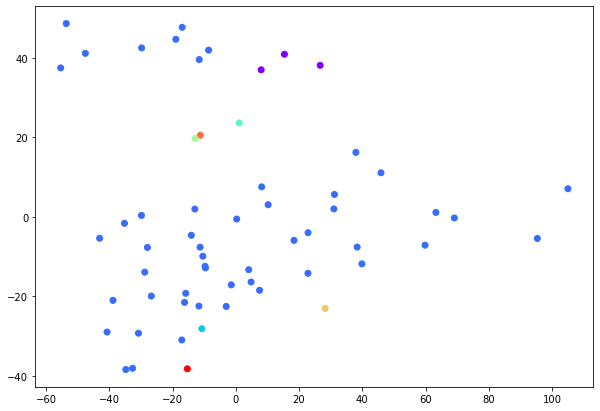

In [113]:
# Dividing by agglomerative process in 5 clusters with euclidean distance and ward linkage method
cluster = AgglomerativeClustering(n_clusters=8, affinity='cityblock', linkage='single')  
cluster.fit(data.values)  
# Show result labels of each element
print(cluster.labels_)  
# Separating the labels in each cluster to know the distribution ammount 
unique, counts = np.unique(cluster.labels_, return_counts=True)
result = np.column_stack((unique, counts)) 
# Print result of the separation
print (result)

# It is mandatory to do the principal component analysis to show the scatter plot
pca = PCA(n_components=2)
pca.fit(data.values)
reduced_data = pca.fit_transform(data.values)
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=cluster.labels_, cmap='rainbow') 

## 2.3. Method = Complete

### 2.3.1. Metric = Euclidean

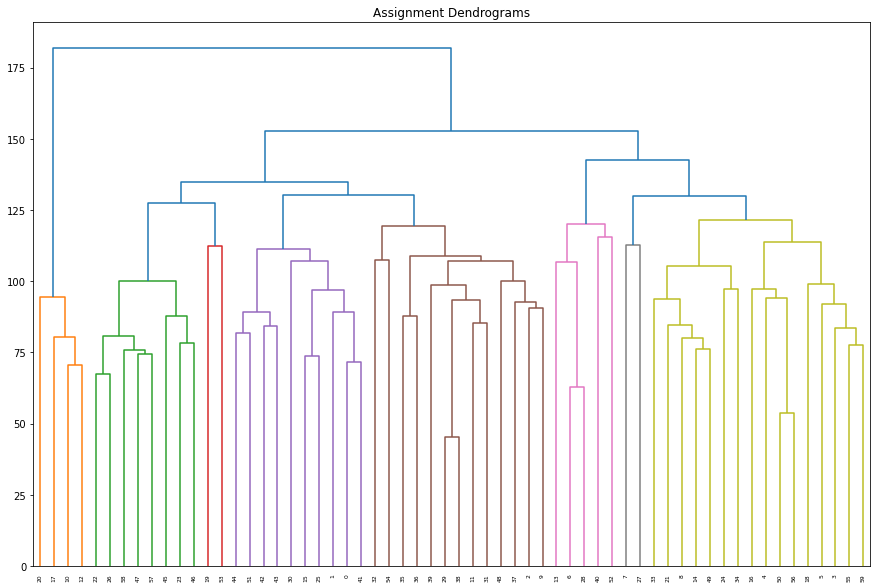

In [114]:
plt.figure(figsize=(15, 10))  
plt.title("Assignment Dendrograms")  
dend = shc.dendrogram(shc.linkage(data.values, method='complete', metric='euclidean'))  

[5 5 2 0 0 0 1 6 0 2 7 2 7 1 0 5 0 7 0 4 7 0 3 3 0 5 3 6 1 2 5 2 2 0 0 2 2
 2 2 2 1 5 5 5 5 3 3 3 2 0 0 5 1 4 2 0 0 3 3 0]
[[ 0 16]
 [ 1  5]
 [ 2 13]
 [ 3  8]
 [ 4  2]
 [ 5 10]
 [ 6  2]
 [ 7  4]]


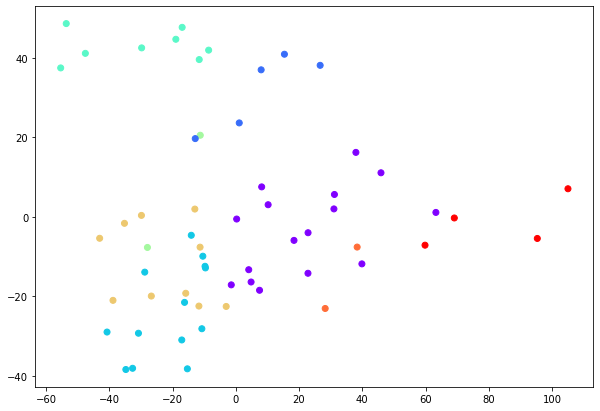

In [115]:
# Dividing by agglomerative process in 5 clusters with euclidean distance and ward linkage method
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='complete')  
cluster.fit(data.values)  
# Show result labels of each element
print(cluster.labels_)  
# Separating the labels in each cluster to know the distribution ammount 
unique, counts = np.unique(cluster.labels_, return_counts=True)
result = np.column_stack((unique, counts)) 
# Print result of the separation
print (result)

# It is mandatory to do the principal component analysis to show the scatter plot
pca = PCA(n_components=2)
pca.fit(data.values)
reduced_data = pca.fit_transform(data.values)
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=cluster.labels_, cmap='rainbow') 

### 2.3.2. Metric = Minkowski

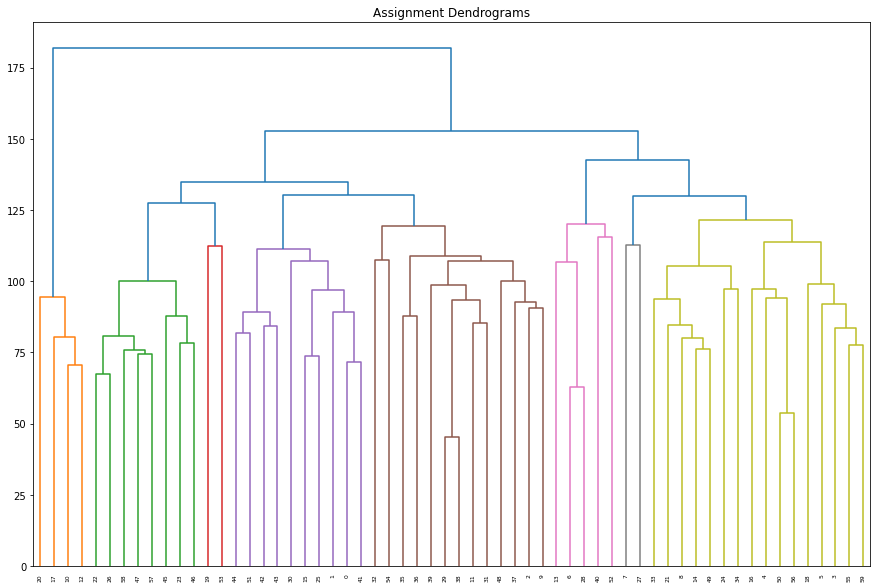

In [116]:
plt.figure(figsize=(15, 10))  
plt.title("Assignment Dendrograms")  
dend = shc.dendrogram(shc.linkage(data.values, method='complete', metric='minkowski'))  

[5 5 2 0 0 0 1 6 0 2 7 2 7 1 0 5 0 7 0 4 7 0 3 3 0 5 3 6 1 2 5 2 2 0 0 2 2
 2 2 2 1 5 5 5 5 3 3 3 2 0 0 5 1 4 2 0 0 3 3 0]
[[ 0 16]
 [ 1  5]
 [ 2 13]
 [ 3  8]
 [ 4  2]
 [ 5 10]
 [ 6  2]
 [ 7  4]]


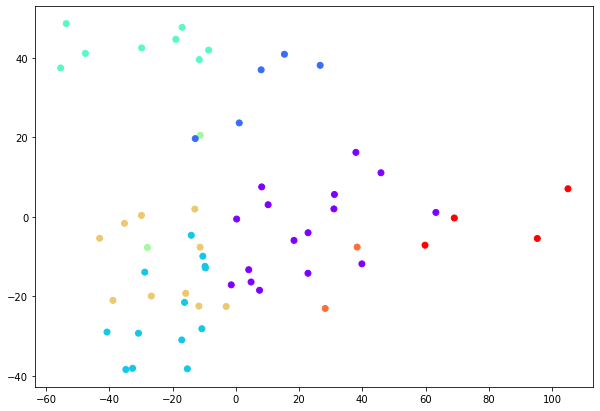

In [117]:
# Dividing by agglomerative process in 5 clusters with euclidean distance and ward linkage method
cluster = AgglomerativeClustering(n_clusters=8, affinity='minkowski', linkage='complete')  
cluster.fit(data.values)  
# Show result labels of each element
print(cluster.labels_)  
# Separating the labels in each cluster to know the distribution ammount 
unique, counts = np.unique(cluster.labels_, return_counts=True)
result = np.column_stack((unique, counts)) 
# Print result of the separation
print (result)

# It is mandatory to do the principal component analysis to show the scatter plot
pca = PCA(n_components=2)
pca.fit(data.values)
reduced_data = pca.fit_transform(data.values)
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=cluster.labels_, cmap='rainbow') 

### 2.3.3. Metric = Chebyshev

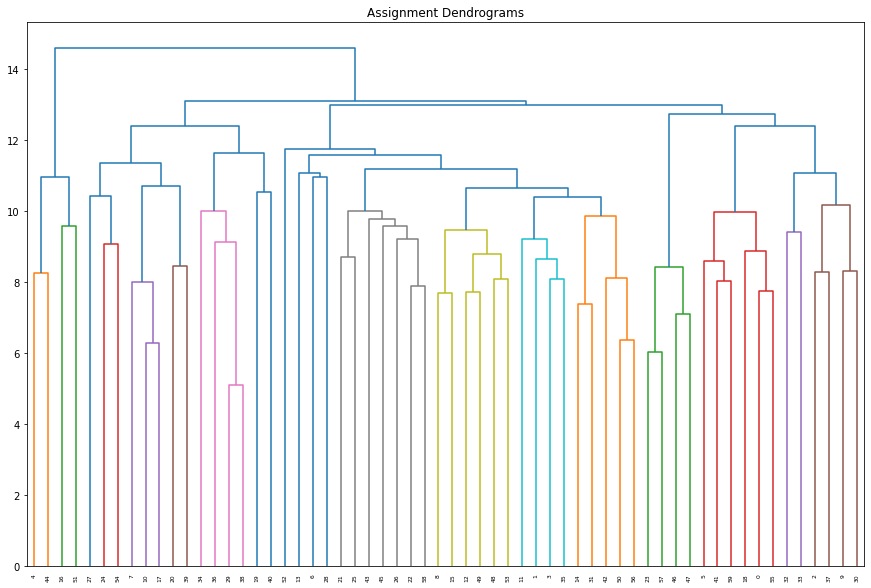

In [118]:
plt.figure(figsize=(15, 10))  
plt.title("Assignment Dendrograms")  
dend = shc.dendrogram(shc.linkage(data.values, method='complete', metric='chebyshev'))  

[ 6  1  3  1 14  6  0  2  1  3  2  1  1 13  1  1 10  2  6  5  2 11 11  9
  4 11 11  4  0  8  3  1 12 12  8  1  8  3  8  2  5  6  1 11 14 11  9  9
  1  1  1 10  7  1  4  6  1  9 11  6]
[[ 0  2]
 [ 1 15]
 [ 2  5]
 [ 3  4]
 [ 4  3]
 [ 5  2]
 [ 6  6]
 [ 7  1]
 [ 8  4]
 [ 9  4]
 [10  2]
 [11  7]
 [12  2]
 [13  1]
 [14  2]]


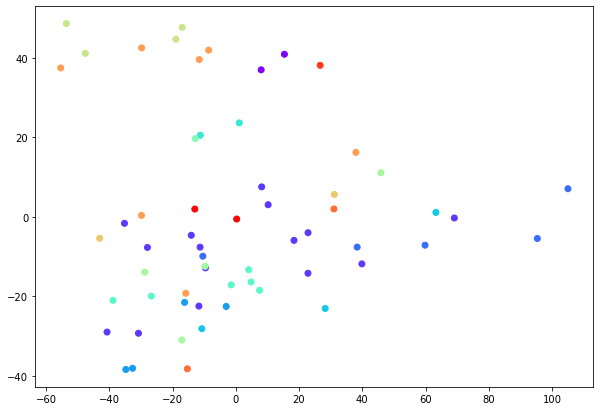

In [119]:
# Dividing by agglomerative process in 5 clusters with euclidean distance and ward linkage method
cluster = AgglomerativeClustering(n_clusters=15, affinity='chebyshev', linkage='complete')  
cluster.fit(data.values)  
# Show result labels of each element
print(cluster.labels_)  
# Separating the labels in each cluster to know the distribution ammount 
unique, counts = np.unique(cluster.labels_, return_counts=True)
result = np.column_stack((unique, counts)) 
# Print result of the separation
print (result)

# It is mandatory to do the principal component analysis to show the scatter plot
pca = PCA(n_components=2)
pca.fit(data.values)
reduced_data = pca.fit_transform(data.values)
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=cluster.labels_, cmap='rainbow') 

### 2.3.4. Metric = Cityblock

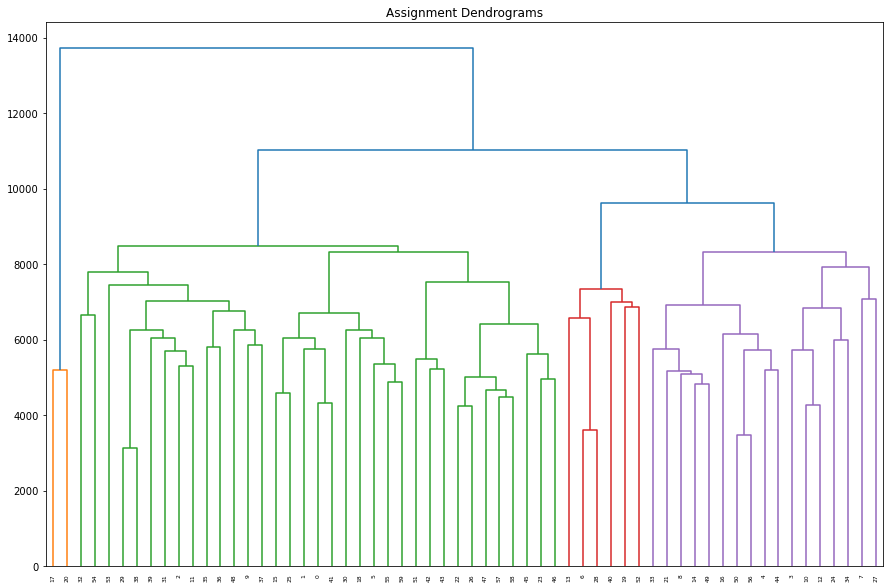

In [120]:
plt.figure(figsize=(15, 10))  
plt.title("Assignment Dendrograms")  
dend = shc.dendrogram(shc.linkage(data.values, method='complete', metric='cityblock'))  

[0 0 0 2 2 0 1 2 2 0 2 0 2 1 2 0 2 3 0 1 3 2 0 0 2 0 0 2 1 0 0 0 0 2 2 0 0
 0 0 0 1 0 0 0 2 0 0 0 0 2 2 0 1 0 0 0 2 0 0 0]
[[ 0 35]
 [ 1  6]
 [ 2 17]
 [ 3  2]]


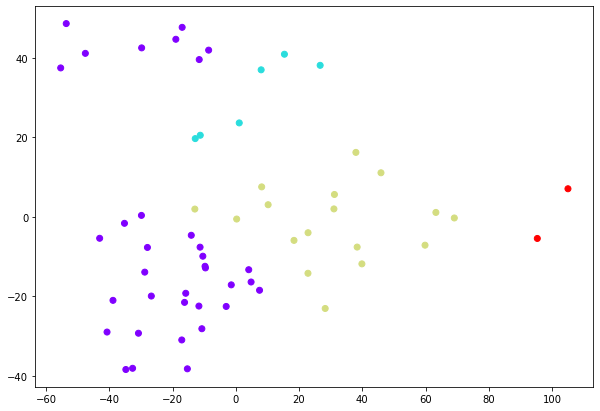

In [121]:
# Dividing by agglomerative process in 5 clusters with euclidean distance and ward linkage method
cluster = AgglomerativeClustering(n_clusters=4, affinity='cityblock', linkage='complete')  
cluster.fit(data.values)  
# Show result labels of each element
print(cluster.labels_)  
# Separating the labels in each cluster to know the distribution ammount 
unique, counts = np.unique(cluster.labels_, return_counts=True)
result = np.column_stack((unique, counts)) 
# Print result of the separation
print (result)

# It is mandatory to do the principal component analysis to show the scatter plot
pca = PCA(n_components=2)
pca.fit(data.values)
reduced_data = pca.fit_transform(data.values)
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=cluster.labels_, cmap='rainbow') 

## 2.4. Method = Average

### 2.4.1. Metric = Euclidean

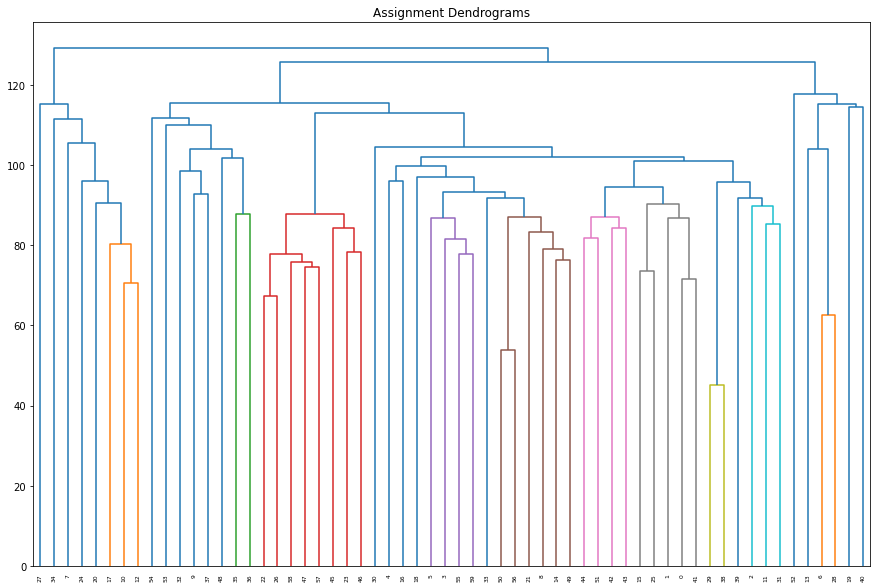

In [122]:
plt.figure(figsize=(15, 10))  
plt.title("Assignment Dendrograms")  
dend = shc.dendrogram(shc.linkage(data.values, method='average', metric='euclidean'))  

[ 4  4  4  4  4  4  2  1  4  0  1  4  1  2  4  4  4  1  4  7  1  4  3  3
  1  4  3  6  2  4  4  4  0  4 10  0  0  0  4  4  5  4  4  4  4  3  3  3
  0  4  4  4  8  0  9  4  4  3  3  4]
[[ 0  7]
 [ 1  6]
 [ 2  3]
 [ 3  8]
 [ 4 30]
 [ 5  1]
 [ 6  1]
 [ 7  1]
 [ 8  1]
 [ 9  1]
 [10  1]]


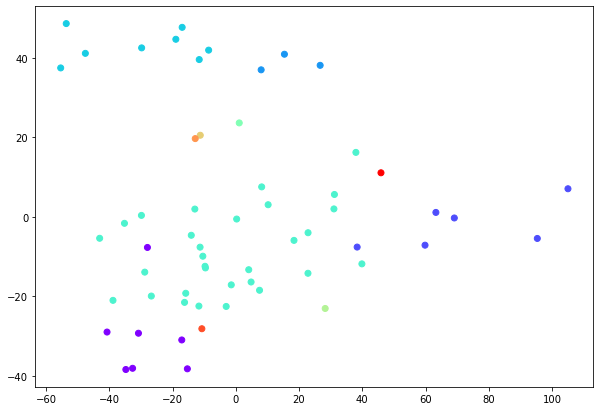

In [123]:
# Dividing by agglomerative process in 5 clusters with euclidean distance and ward linkage method
cluster = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='average')  
cluster.fit(data.values)  
# Show result labels of each element
print(cluster.labels_)  
# Separating the labels in each cluster to know the distribution ammount 
unique, counts = np.unique(cluster.labels_, return_counts=True)
result = np.column_stack((unique, counts)) 
# Print result of the separation
print (result)

# It is mandatory to do the principal component analysis to show the scatter plot
pca = PCA(n_components=2)
pca.fit(data.values)
reduced_data = pca.fit_transform(data.values)
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=cluster.labels_, cmap='rainbow') 

### 2.4.2. Metric = Minkowski

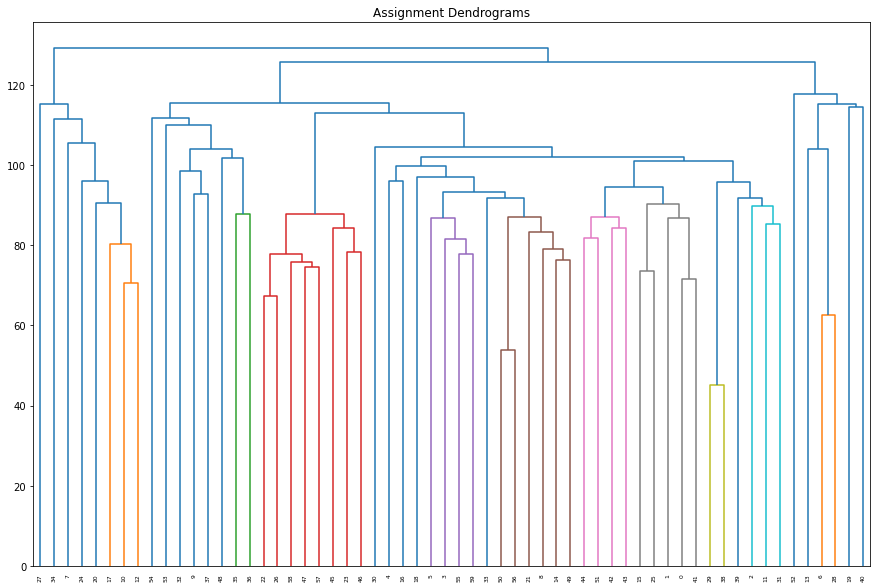

In [124]:
plt.figure(figsize=(15, 10))  
plt.title("Assignment Dendrograms")  
dend = shc.dendrogram(shc.linkage(data.values, method='average', metric='minkowski'))  

[ 4  4  4  4  4  4  2  1  4  0  1  4  1  2  4  4  4  1  4  7  1  4  3  3
  1  4  3  6  2  4  4  4  0  4 10  0  0  0  4  4  5  4  4  4  4  3  3  3
  0  4  4  4  8  0  9  4  4  3  3  4]
[[ 0  7]
 [ 1  6]
 [ 2  3]
 [ 3  8]
 [ 4 30]
 [ 5  1]
 [ 6  1]
 [ 7  1]
 [ 8  1]
 [ 9  1]
 [10  1]]


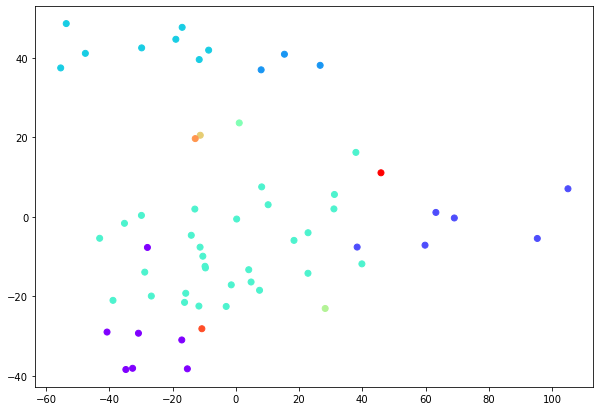

In [125]:
# Dividing by agglomerative process in 5 clusters with euclidean distance and ward linkage method
cluster = AgglomerativeClustering(n_clusters=11, affinity='minkowski', linkage='average')  
cluster.fit(data.values)  
# Show result labels of each element
print(cluster.labels_)  
# Separating the labels in each cluster to know the distribution ammount 
unique, counts = np.unique(cluster.labels_, return_counts=True)
result = np.column_stack((unique, counts)) 
# Print result of the separation
print (result)

# It is mandatory to do the principal component analysis to show the scatter plot
pca = PCA(n_components=2)
pca.fit(data.values)
reduced_data = pca.fit_transform(data.values)
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=cluster.labels_, cmap='rainbow') 

### 2.4.3. Metric = Chebyshev

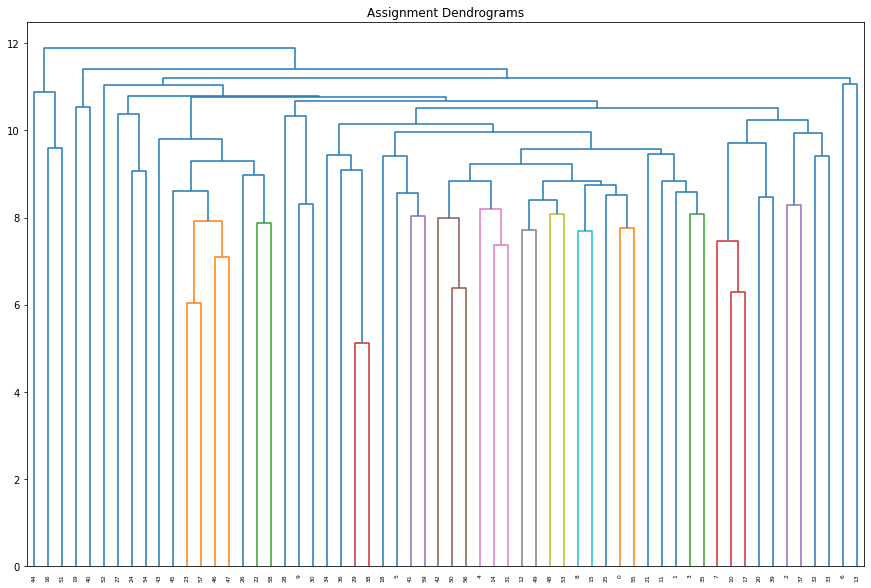

In [126]:
plt.figure(figsize=(15, 10))  
plt.title("Assignment Dendrograms")  
dend = shc.dendrogram(shc.linkage(data.values, method='average', metric='chebyshev'))  

[ 2  2  0  2  2  2  9  0  2  8  0  2  2  7  2  2  3  0  2 10  0  2  1  1
  4  2  1 12 13  2  8  2  0  0  2  2  2  0  2  0 11  2  2  1  6  1  1  1
  2  2  2  3  5  2  4  2  2  1  1  2]
[[ 0  9]
 [ 1  9]
 [ 2 28]
 [ 3  2]
 [ 4  2]
 [ 5  1]
 [ 6  1]
 [ 7  1]
 [ 8  2]
 [ 9  1]
 [10  1]
 [11  1]
 [12  1]
 [13  1]]


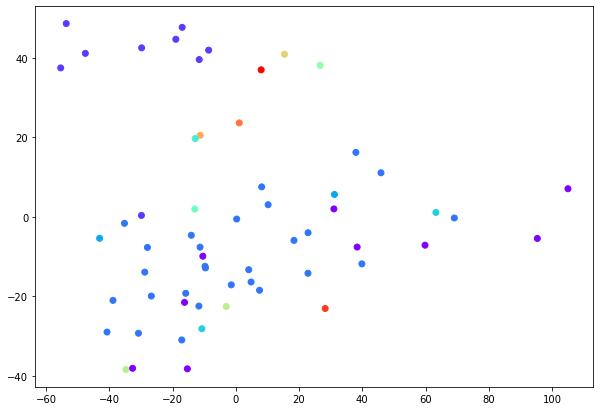

In [127]:
# Dividing by agglomerative process in 5 clusters with euclidean distance and ward linkage method
cluster = AgglomerativeClustering(n_clusters=14, affinity='chebyshev', linkage='average')  
cluster.fit(data.values)  
# Show result labels of each element
print(cluster.labels_)  
# Separating the labels in each cluster to know the distribution ammount 
unique, counts = np.unique(cluster.labels_, return_counts=True)
result = np.column_stack((unique, counts)) 
# Print result of the separation
print (result)

# It is mandatory to do the principal component analysis to show the scatter plot
pca = PCA(n_components=2)
pca.fit(data.values)
reduced_data = pca.fit_transform(data.values)
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=cluster.labels_, cmap='rainbow') 

### 2.4.4. Metric = Citylock

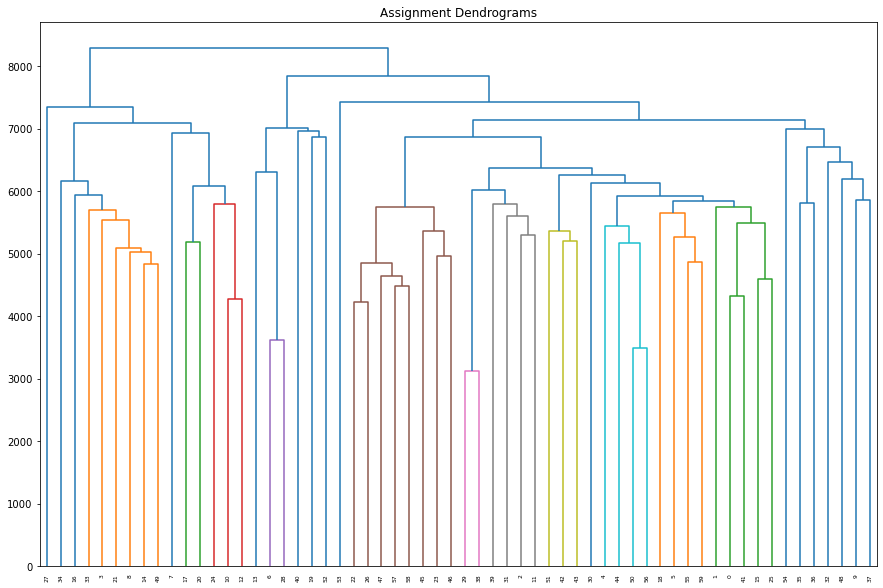

In [128]:
plt.figure(figsize=(15, 10))  
plt.title("Assignment Dendrograms")  
dend = shc.dendrogram(shc.linkage(data.values, method='average', metric='cityblock'))  

[ 0  0  0  2  0  0  3 10  2  1  5  0  5  3  2  0  2  5  0 11  5  2  0  0
  5  0  0  9  3  0  0  0  1  2  2  1  1  1  0  0  4  0  0  0  0  0  0  0
  1  2  0  0  6  7  8  0  0  0  0  0]
[[ 0 31]
 [ 1  6]
 [ 2  8]
 [ 3  3]
 [ 4  1]
 [ 5  5]
 [ 6  1]
 [ 7  1]
 [ 8  1]
 [ 9  1]
 [10  1]
 [11  1]]


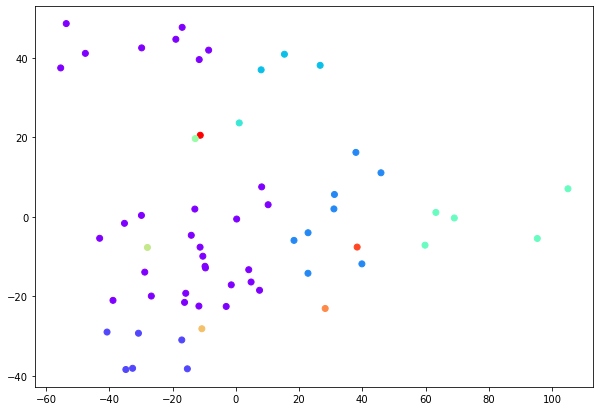

In [129]:
# Dividing by agglomerative process in 5 clusters with euclidean distance and ward linkage method
cluster = AgglomerativeClustering(n_clusters=12, affinity='cityblock', linkage='average')  
cluster.fit(data.values)  
# Show result labels of each element
print(cluster.labels_)  
# Separating the labels in each cluster to know the distribution ammount 
unique, counts = np.unique(cluster.labels_, return_counts=True)
result = np.column_stack((unique, counts)) 
# Print result of the separation
print (result)

# It is mandatory to do the principal component analysis to show the scatter plot
pca = PCA(n_components=2)
pca.fit(data.values)
reduced_data = pca.fit_transform(data.values)
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=cluster.labels_, cmap='rainbow') 

# Bibliography
https://runebook.dev/es/docs/scikit_learn/modules/generated/sklearn.cluster.agglomerativeclustering

https://www.displayr.com/what-is-hierarchical-clustering/

https://stats.stackexchange.com/questions/63546/comparing-hierarchical-clustering-dendrograms-obtained-by-different-distances

https://moodle.upm.es/titulaciones/oficiales/pluginfile.php/10079017/mod_resource/content/1/Unit3.2-UnsupervisedLearning-HierarchicalClustering.pdf

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html